In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sb


In [21]:
# Cargar datos desde el archivo CSV
datos = pd.read_csv(filepath_or_buffer = "/home/darok/Documentos/Escuela/IEDC/uteq/Evalucion2/comprar_alquilar.csv")


In [22]:
datos

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [23]:
#normalizando los datos
scaler=StandardScaler()
scaler.fit(datos) # calculando la media para poder hacer la transformacion
X_scaled=scaler.transform(datos)# escalando los datos y normalizandolos

In [24]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=9) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA. Reducción de Dimensionalidad

In [25]:
# Proyección de las observaciones de entrenamiento
X_pca = pd.DataFrame(
    X_pca,
    columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'],
    index   = datos.index
)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.535449,0.068159,-0.545565,-2.179020,-0.355643,-0.348843,-0.510708,-0.878541,0.272100
1,-1.282144,0.823909,1.233645,0.081871,1.201388,0.835942,-1.234253,-0.097668,0.798401
2,-0.779890,2.176401,0.438365,-1.265585,-1.003528,-0.270164,1.420402,0.876554,-0.238486
3,-3.150472,-1.288086,-0.290494,-0.190528,1.351337,1.281028,-0.841160,0.572358,0.269428
4,-0.940483,-0.672760,-0.925130,-0.603372,-0.491272,-1.490638,0.156435,0.067180,0.611393


In [26]:
print("Porcentaje de varianza por componente", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:2]))

Porcentaje de varianza por componente (202, 9)
[0.27368381 0.23958688 0.10991099 0.10411098 0.09105662 0.07352523
 0.0457761  0.02745036 0.02469122]
suma: 0.5132706915557044


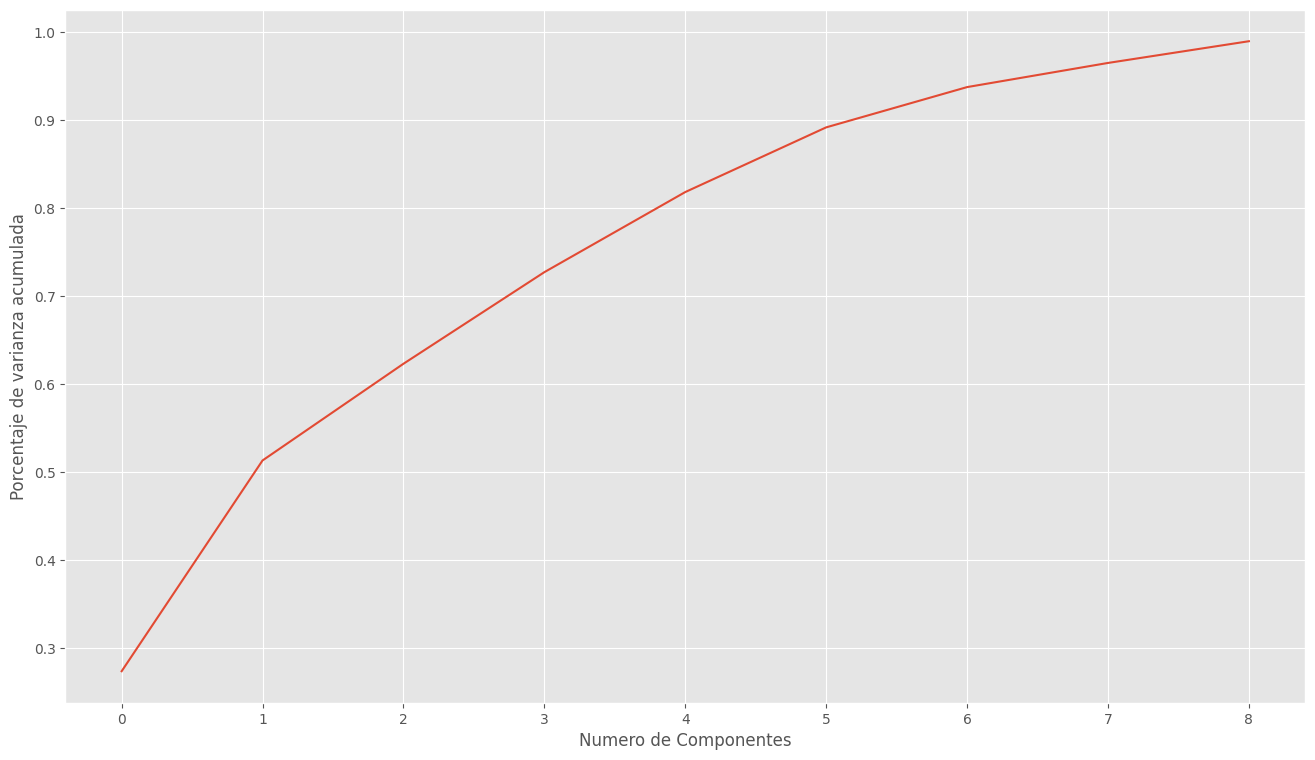

In [27]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
plt.plot(np.cumsum(pca.explained_variance_ratio_,))
plt.xlabel('Numero de Componentes')
plt.ylabel('Porcentaje de varianza acumulada')
plt.show()

In [28]:
#definimos X y Y
Y = datos.index
Y = pd.DataFrame(Y,columns= ['Estados'])
X = X_pca[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']]
X = X.reset_index()

In [29]:
# Asegurarse de que ambas listas tengan la misma longitud
num_componentes = 9 
nombres_componentes = [f'PC{i}' for i in range(1, num_componentes + 1)]

In [30]:
# Crear DataFrame con las listas ajustadas
df = pd.DataFrame({'var': pca.explained_variance_ratio_, 'PC': nombres_componentes})
# df=pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']})


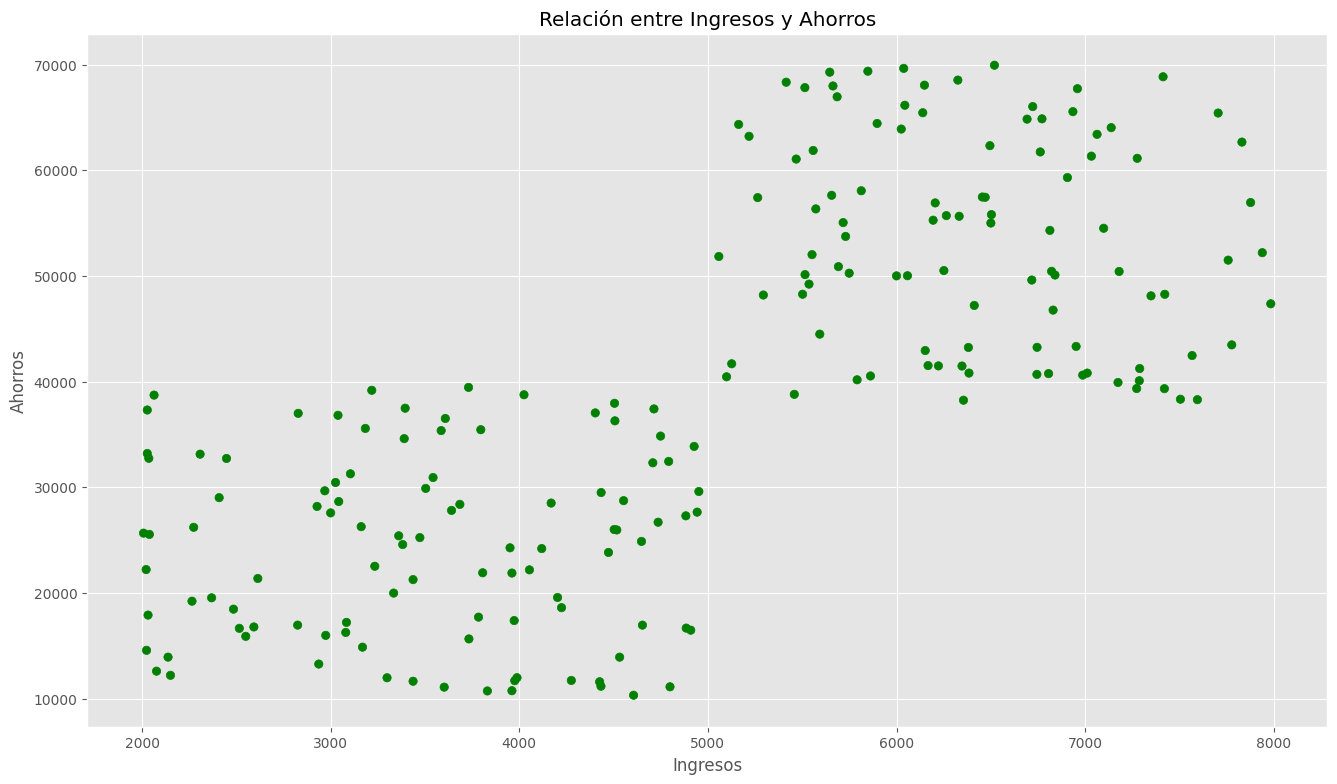

In [31]:
# Crear una lista de colores, por ejemplo, usando un criterio como el valor de 'ahorros'
colores = ['green' if ahorro > 5000 else 'blue' for ahorro in datos['ahorros']]

plt.scatter(datos['ingresos'], datos['ahorros'], c=colores)
plt.xlabel('Ingresos')
plt.ylabel('Ahorros')
plt.title('Relación entre Ingresos y Ahorros')
plt.show()

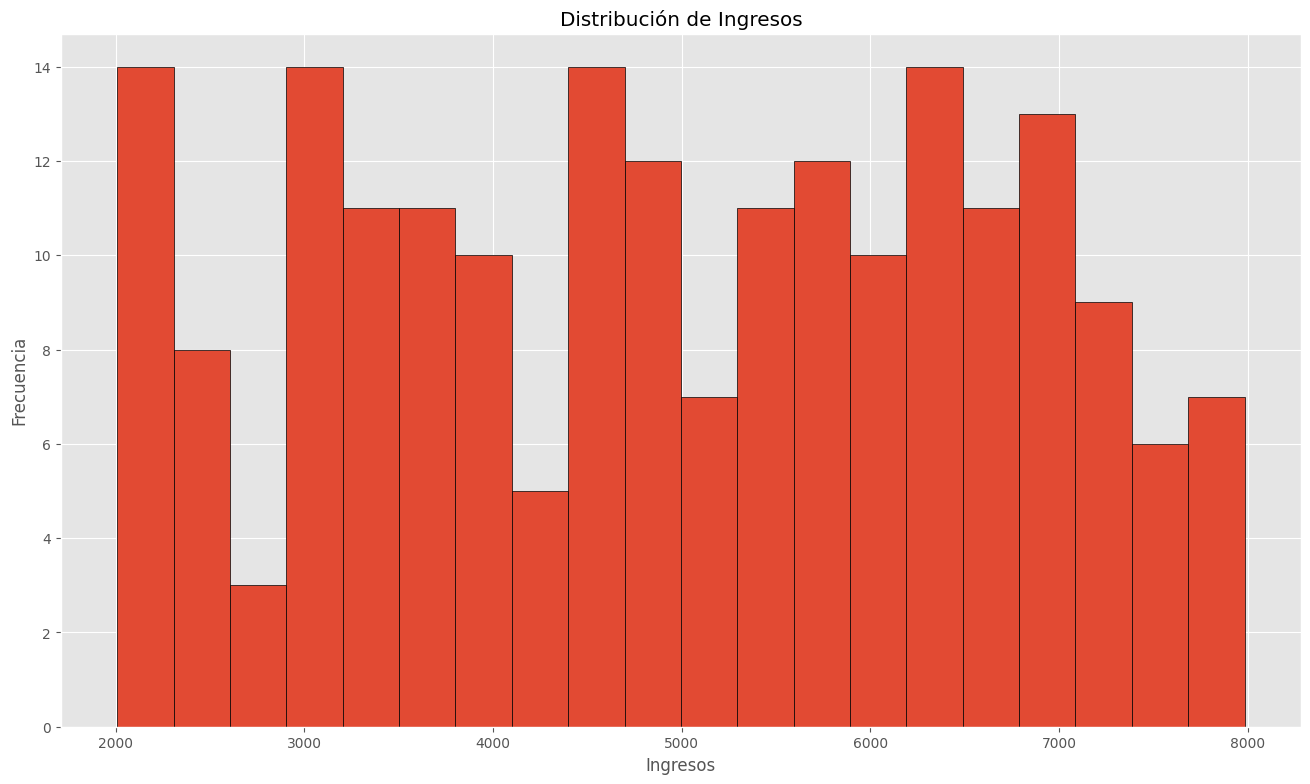

In [32]:
plt.hist(datos['ingresos'], bins=20, edgecolor='black')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ingresos')
plt.show()